In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from score import collect_data, score
import os

In [122]:
all_labels, all_sconf, all_pconf = [], [], []
folders = os.listdir("data")
for folder in folders:
#     print(folder)
    if not os.path.isdir(os.path.join(data_path, folder)):
        continue
    try:
        labels_30fps = pd.read_csv(os.path.join("data", folder, folder + '_VAD_MANUAL.csv'),usecols=["speech_activity"])
        labels_25fps = labels_30fps[labels_30fps.index % 6 != 0].reset_index(drop=True)
        
        sync_path=f"/media/chris/M2/2-Processed_Data/syncnet_confidences/pyavi/{folder}/framewise_confidences.csv"
        sync_conf = pd.read_csv(sync_path,usecols=["Confidence"])[:len(labels_25fps)]
        perf_path=f"/media/chris/M2/2-Processed_Data/perfectmatch_confidences/pyavi/{folder}/framewise_confidences.csv"
        perf_conf = pd.read_csv(perf_path,usecols=["Confidence"])[:len(labels_25fps)]

        labels = labels_25fps.values
        
        c = sync_conf.values
        sync_conf = np.concatenate([-c,c],axis=1)
        c = perf_conf.values
        perf_conf = np.concatenate([-c,c],axis=1)
        all_labels.append(labels)
        all_sconf.append(sync_conf)
        all_pconf.append(perf_conf)
    except Exception as e:
        print(e)
        continue
all_labels = np.concatenate(all_labels, axis=0)
all_sconf = np.concatenate(all_sconf, axis=0)
all_pconf = np.concatenate(all_pconf, axis=0)

print("acc, f1, auroc, mAP")
print(score(all_labels, all_sconf))
print(score(all_labels, all_pconf))

# (0.38483115351629504, 0.09475979949439776, 0.3126253917610884, 0.43658345356197836)
# (0.28143063893653514, 0.049198222038131, 0.0929073508799746, 0.34581680026463046)

[Errno 2] No such file or directory: '/media/chris/M2/2-Processed_Data/syncnet_confidences/pyavi/5c/framewise_confidences.csv'
[Errno 2] No such file or directory: '/media/chris/M2/2-Processed_Data/syncnet_confidences/pyavi/5l/framewise_confidences.csv'
[Errno 2] No such file or directory: '/media/chris/M2/2-Processed_Data/syncnet_confidences/pyavi/5r/framewise_confidences.csv'
acc, f1, auroc, mAP
(0.6175160806174957, 0.546051275526433, 0.6873746082389113, 0.610670608233663)
(0.7210452401372213, 0.6359409802670607, 0.9070926491200253, 0.8744225103356371)


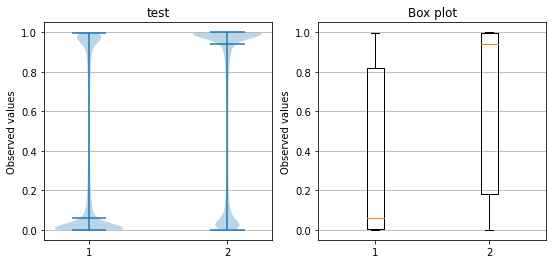

In [108]:
def plot_hist(all_data, title=""):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    # plot violin plot
    axs[0].violinplot(all_data,
                      showmeans=False,
                      showmedians=True)
    axs[0].set_title(title)

    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title('Box plot')

    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))])
        ax.set_ylabel('Observed values')

    # add x-tick labels
    plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))])
#              xticklabels=['0', '1'])
    
all_data = [all_confidences[:,0],all_confidences[:,1]]
plot_hist(all_data,"test")

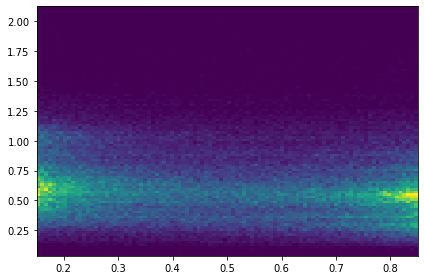

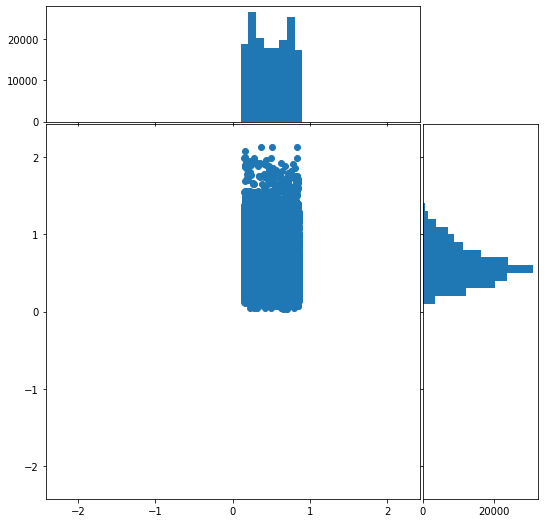

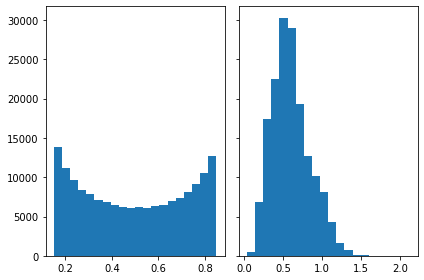

In [73]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

def double_scatter(x,y):    
    fig, ax = plt.subplots(tight_layout=True)
    hist = ax.hist2d(x, y, bins=100)
    plt.show()
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    # use the previously defined function
    scatter_hist(x, y, ax, ax_histx, ax_histy)

    plt.show()

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    n_bins=20
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    axs[1].hist(y, bins=n_bins)
    plt.show()
    
d=(all_confidences[:,1]>=0.15) & (all_confidences[:,1]<=0.85)
x = all_confidences[d,1]
y=avg_ang[d]
double_scatter(x,y)

In [87]:
data_path="data"
model_type="BLSTM"
feature_type="SYNCNET"
label_type="SPEECH"
model_trainer="kalin"

all_confidences, all_labels, all_gazes = collect_data(data_path, model_type, feature_type, label_type, model_trainer)
# acc, f1, auroc, mAP
print(score(all_labels, all_confidences))
all_confidences = math.e**all_confidences
print(score(all_labels, all_confidences))

avg_ang = (all_gazes[:,0] +all_gazes[:,1])/2
avg_at = (all_gazes[:,2] +all_gazes[:,3])/2

print(score(all_labels, all_confidences))


(0.48127666996986673, 0.4472838200930646, 0.6621731694807959, 0.6373531377376087)
(0.48127666996986673, 0.4472838200930646, 0.6621731694807959, 0.6373531377376087)
1582304


array([[0.17954062, 0.3291074 , 1.        , 0.        ],
       [0.17677538, 0.33964667, 1.        , 0.        ],
       [0.20620258, 0.33852765, 1.        , 0.        ],
       ...,
       [1.05048044, 1.65786819, 0.        , 0.        ],
       [1.0493472 , 1.65801373, 0.        , 0.        ],
       [1.04599312, 1.65838739, 0.        , 0.        ]])

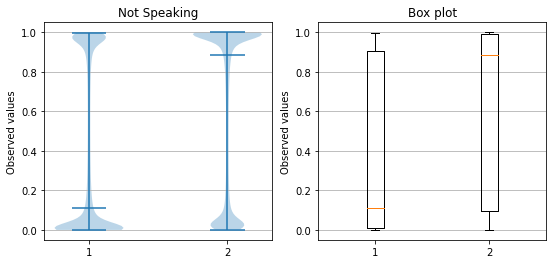

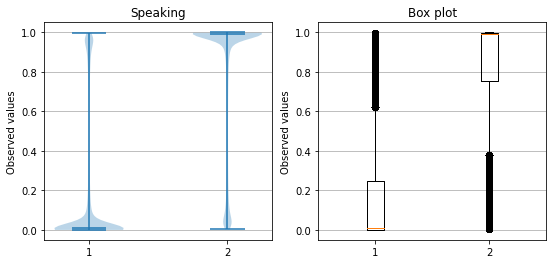

In [81]:
d=all_labels==0
all_data = [all_confidences[d,0],all_confidences[d,1]]
plot_hist(all_data,"Not Speaking")
d=all_labels==1
all_data = [all_confidences[d,0],all_confidences[d,1]]
plot_hist(all_data,"Speaking")

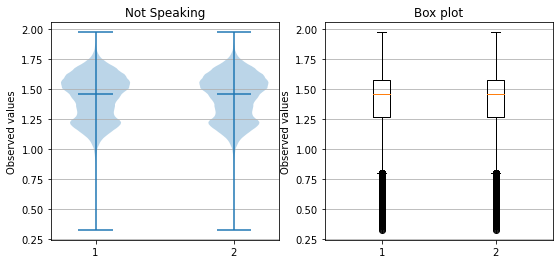

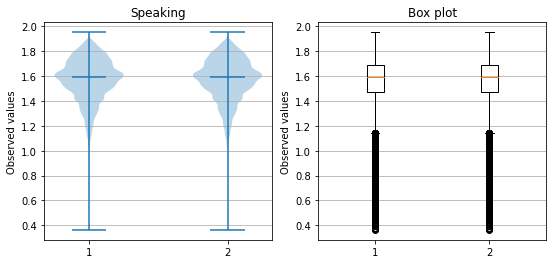

In [83]:
lower_bound=1
upper_bound=2

m = (lower_bound-upper_bound)/75
gazes_mult = avg_ang  * (180/math.pi) * m + upper_bound


d=all_labels==0
all_data = [gazes_mult[d],gazes_mult[d]]
plot_hist(all_data,"Not Speaking")
d=all_labels==1
all_data = [gazes_mult[d],gazes_mult[d]]
plot_hist(all_data, "Speaking")